<a href="https://colab.research.google.com/github/theresiasns/capstone/blob/main/Corn_MobileNet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os

In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [5]:
base_dir="/content/drive/MyDrive/corn/"
!ls"/content/drive/MyDrive/corn/"

/bin/bash: ls/content/drive/MyDrive/corn/: No such file or directory


In [6]:
directory = os.path.join(base_dir)

In [7]:
train_dir = os.path.join(directory, 'train')
validation_dir = os.path.join(directory, 'val')

In [8]:
Name=[]
for file in os.listdir(train_dir):
    Name+=[file]
print(Name)
print(len(Name))

['Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']
4


In [9]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [10]:
img_width, img_height = 224, 224
batch_size=32

In [12]:
# Pra-pemrosesan gambar
train_datagen = ImageDataGenerator(rescale = 1./255,
                                       rotation_range = 40,
                                       width_shift_range = .2,
                                       height_shift_range = .2,
                                       shear_range = .2,
                                       zoom_range = 0.3,
                                       horizontal_flip = True,
                                       vertical_flip=True,
                                       brightness_range=[0.5, 1.5],
                                       featurewise_center=True,
                                       featurewise_std_normalization=True,
                                       fill_mode = 'nearest',
                                   )

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True)

Found 3080 images belonging to 4 classes.
Found 772 images belonging to 4 classes.


In [13]:
import tensorflow as tf

# Memuat model VGG16 tanpa lapisan klasifikasi
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

9406464/9406464 [==============================] - 1s 0us/step


In [14]:
# Menambahkan lapisan klasifikasi baru
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

In [15]:
# Menggabungkan model dasar VGG16 dengan lapisan klasifikasi baru
model = Model(inputs=base_model.input, outputs=predictions)

In [16]:
# Mematikan pembelajaran pada lapisan dasar
for layer in base_model.layers:
    layer.trainable = False

In [17]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
history= model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50
96/96 [==============================] - 1349s 14s/step - loss: 0.8098 - accuracy: 0.6857 - val_loss: 0.3676 - val_accuracy: 0.8763
Epoch 2/50
96/96 [==============================] - 53s 549ms/step - loss: 0.3715 - accuracy: 0.8586 - val_loss: 0.2480 - val_accuracy: 0.9141
Epoch 3/50
96/96 [==============================] - 51s 531ms/step - loss: 0.3192 - accuracy: 0.8753 - val_loss: 0.2115 - val_accuracy: 0.9193
Epoch 4/50
96/96 [==============================] - 54s 563ms/step - loss: 0.2707 - accuracy: 0.8957 - val_loss: 0.1905 - val_accuracy: 0.9271
Epoch 5/50
96/96 [==============================] - 52s 542ms/step - loss: 0.2660 - accuracy: 0.8927 - val_loss: 0.1967 - val_accuracy: 0.9232
Epoch 6/50
96/96 [==============================] - 52s 543ms/step - loss: 0.2518 - accuracy: 0.9022 - val_loss: 0.1897 - val_accuracy: 0.9258
Epoch 7/50
96/96 [==============================] - 53s 549ms/step - loss: 0.2219 - accuracy: 0.9098 - val_loss: 0.1738 - val_accuracy: 0.9258

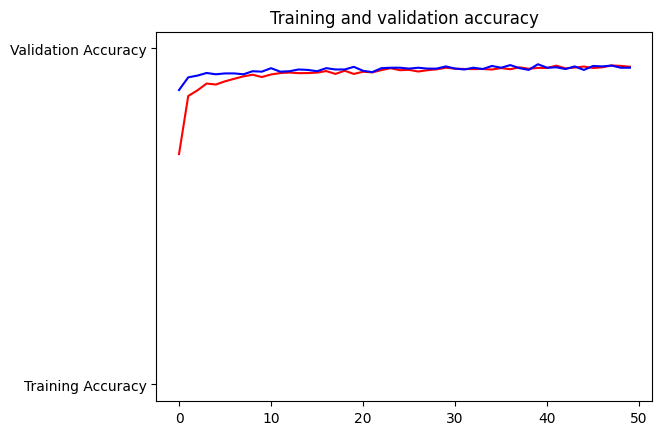

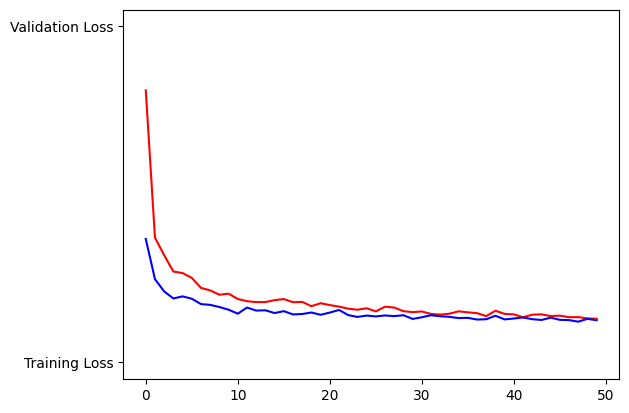

In [19]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [26]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(224,224))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)

  print(classes[0])
  value=np.argmax(classes)
  move_name=mapper(value)
  
  print("Prediction is {}.".format(move_name))

Saving spot corn.png to spot corn.png
1/1 [==============================] - 0s 23ms/step
[9.7879261e-01 8.3730947e-03 1.2775136e-02 5.9164988e-05]
Prediction is Corn_(maize)___Common_rust_.
